logistic [10, 10, 10, 10, 10, 10, 10]
dml-time-separate [10, 10, 10, 10, 10, 10, 10]
dml-non-ortho-time-separate [10, 10, 10, 10, 10, 10, 10]


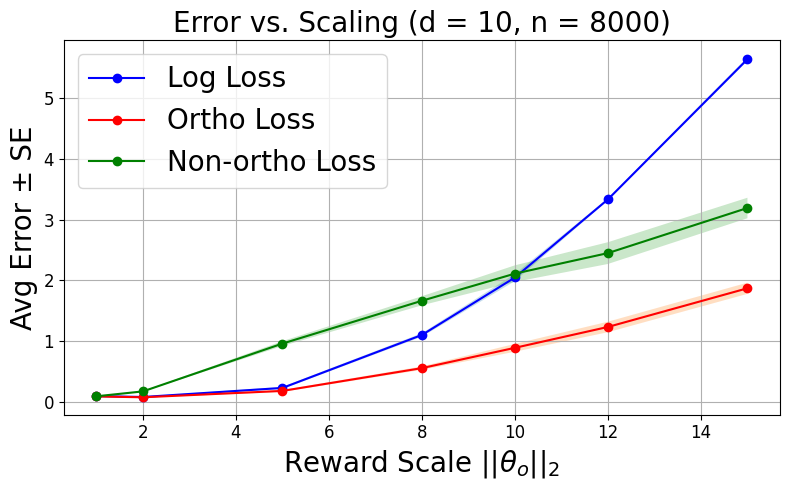

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# -------------------------------------------------
# 0)  Load results dictionary
# -------------------------------------------------
with open('data_gen/dictionary_diff_diff_data.pkl', 'rb') as f:
    dict_diff_comp_theta_data = pickle.load(f)

# -------------------------------------------------
# 1)  Fixed experiment settings
# -------------------------------------------------
fixed_dim   = 10
data_points = 8000
a_val_fixed = 1.0


# -------------------------------------------------
# 2)  Choose the three curves to plot
# -------------------------------------------------
plot1 = [
    "logistic",                               # log-loss baseline
    "dml-time-separate",            # orthogonal
    "dml-non-ortho-time-separate"   # non-orthogonal
]

#  Clean legend labels
label_map = {
    "logistic":                               "Log Loss",
    "dml-time-separate":            "Ortho Loss",
    "dml-non-ortho-time-separate":  "Non-ortho Loss",
}

color_map = {
    "logistic":                               "blue",
    "dml-time-separate":            "red",
    "dml-non-ortho-time-separate":  "green",
}

# -------------------------------------------------
# 3)  Collect all bounds that have data for these settings
# -------------------------------------------------
bounds = sorted({
    bound
    for (bound, _, dim, dp, a_val) in dict_diff_comp_theta_data.keys()
    if dim == fixed_dim and dp == data_points and a_val == a_val_fixed
})

if not bounds:
    raise ValueError("No matching entries found — check the fixed parameters.")

# -------------------------------------------------
# 4)  Pre-allocate containers for mean / std
# -------------------------------------------------
avg1 = {m: [] for m in plot1}
std1 = {m: [] for m in plot1}
len1 = {m: [] for m in plot1}

# -------------------------------------------------
# 5)  Populate avg / std for each bound
# -------------------------------------------------
for bound in bounds:
    dists = {m: [] for m in plot1}

    # collect over all iterations
    for (b, _, dim, dp, a_val), metrics in dict_diff_comp_theta_data.items():
        if b == bound and dim == fixed_dim and dp == data_points and a_val == a_val_fixed:
            for m in plot1:
                if m in metrics:                       # guard: method present for this run
                    dists[m].append(metrics[m]['distance'])

    # compute mean ± standard error
    for m in plot1:
        arr = np.asarray(dists[m])
        avg1[m].append(arr.mean() if arr.size else np.nan)
        std1[m].append(arr.std(ddof=1) / np.sqrt(arr.size) if arr.size else np.nan)  # Standard error (unbiased)
        len1[m].append(arr.size if arr.size else np.nan)

# -------------------------------------------------
# 6)  Plot
# -------------------------------------------------
plt.figure(figsize=(8, 5))

for m in plot1:
    y     = np.asarray(avg1[m])
    yerr  = np.asarray(std1[m])
    plt.plot(bounds, y, marker='o', label=label_map[m], color = color_map[m])
    plt.fill_between(bounds, y - yerr, y + yerr, alpha=0.25)
    print (m, len1[m])

plt.xlabel(r"Reward Scale $||\theta_o||_2$",fontsize=20)
plt.ylabel(f'Avg Error ± SE', fontsize=20)
plt.title(f"Error vs. Scaling (d = {fixed_dim}, n = {data_points})", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=20, loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig(f"plots/figure_dim{fixed_dim}.png", dpi=300)
plt.show()

logistic [10, 10, 10, 10, 10, 10, 10]
dml-time-separate [10, 10, 10, 10, 10, 10, 10]
dml-non-ortho-time-separate [10, 10, 10, 10, 10, 10, 10]


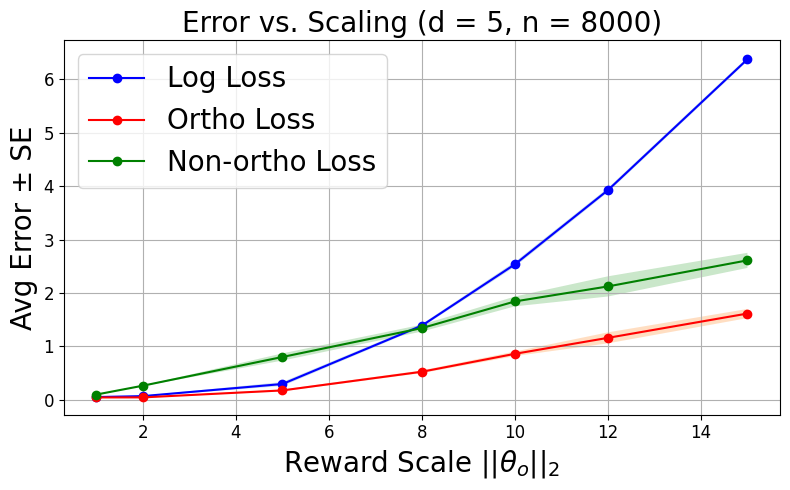

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# -------------------------------------------------
# 0)  Load results dictionary
# -------------------------------------------------
with open('data_gen/dictionary_diff_diff_data.pkl', 'rb') as f:
    dict_diff_comp_theta_data = pickle.load(f)

# -------------------------------------------------
# 1)  Fixed experiment settings
# -------------------------------------------------
fixed_dim   = 5
data_points = 8000
a_val_fixed = 1.0
alpha = 0.25

# -------------------------------------------------
# 2)  Choose the three curves to plot
# -------------------------------------------------
plot1 = [
    "logistic",                               # log-loss baseline
    "dml-time-separate",            # orthogonal
    "dml-non-ortho-time-separate"   # non-orthogonal
]

#  Clean legend labels
label_map = {
    "logistic":                               "Log Loss",
    "dml-time-separate":            "Ortho Loss",
    "dml-non-ortho-time-separate":  "Non-ortho Loss",
}

color_map = {
    "logistic":                               "blue",
    "dml-time-separate":            "red",
    "dml-non-ortho-time-separate":  "green",
}

# -------------------------------------------------
# 3)  Collect all bounds that have data for these settings
# -------------------------------------------------
bounds = sorted({
    bound
    for (bound, _, dim, dp, a_val) in dict_diff_comp_theta_data.keys()
    if dim == fixed_dim and dp == data_points and a_val == a_val_fixed
})

if not bounds:
    raise ValueError("No matching entries found — check the fixed parameters.")

# -------------------------------------------------
# 4)  Pre-allocate containers for mean / std
# -------------------------------------------------
avg1 = {m: [] for m in plot1}
std1 = {m: [] for m in plot1}
len1 = {m: [] for m in plot1}

# -------------------------------------------------
# 5)  Populate avg / std for each bound
# -------------------------------------------------
for bound in bounds:
    dists = {m: [] for m in plot1}

    # collect over all iterations
    for (b, _, dim, dp, a_val), metrics in dict_diff_comp_theta_data.items():
        if b == bound and dim == fixed_dim and dp == data_points and a_val == a_val_fixed:
            for m in plot1:
                if m in metrics:                       # guard: method present for this run
                    dists[m].append(metrics[m]['distance'])

    # compute mean ± standard error
    for m in plot1:
        arr = np.asarray(dists[m])
        avg1[m].append(arr.mean() if arr.size else np.nan)
        std1[m].append(arr.std(ddof=1) / np.sqrt(arr.size) if arr.size else np.nan)  # Standard error (unbiased)
        len1[m].append(arr.size if arr.size else np.nan)

# -------------------------------------------------
# 6)  Plot
# -------------------------------------------------
plt.figure(figsize=(8, 5))

for m in plot1:
    y     = np.asarray(avg1[m])
    yerr  = np.asarray(std1[m])
    plt.plot(bounds, y, marker='o', label=label_map[m], color = color_map[m])
    plt.fill_between(bounds, y - yerr, y + yerr, alpha=0.25)
    print (m, len1[m])


plt.xlabel(r"Reward Scale $||\theta_o||_2$",fontsize=20)
plt.ylabel(f'Avg Error ± SE', fontsize=20)
plt.title(f"Error vs. Scaling (d = {fixed_dim}, n = {data_points})", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=20, loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig(f"plots/figure_dim{fixed_dim}.png", dpi=300)
plt.show()


logistic len [10, 10, 10, 10, 10, 10, 10]
dml-time-separate len [10, 10, 10, 10, 10, 10, 10]
dml-non-ortho-time-separate len [10, 10, 10, 10, 10, 10, 10]


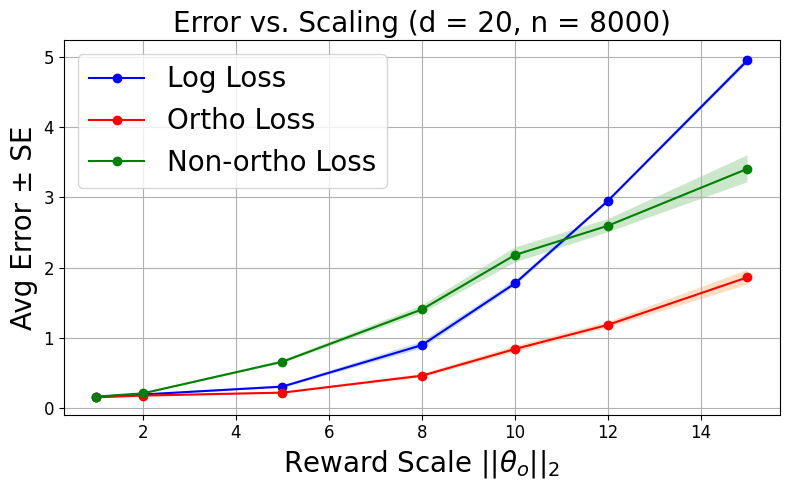

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# -------------------------------------------------
# 0)  Load results dictionary
# -------------------------------------------------
with open('data_gen/dictionary_diff_diff_data.pkl', 'rb') as f:
    dict_diff_comp_theta_data = pickle.load(f)

# -------------------------------------------------
# 1)  Fixed experiment settings
# -------------------------------------------------
fixed_dim   = 20
data_points = 8000
a_val_fixed = 1.0
alpha = 0.25

# -------------------------------------------------
# 2)  Choose the three curves to plot
# -------------------------------------------------
plot1 = [
    "logistic",                               # log-loss baseline
    "dml-time-separate",            # orthogonal
    "dml-non-ortho-time-separate"   # non-orthogonal
]

#  Clean legend labels
label_map = {
    "logistic":                               "Log Loss",
    "dml-time-separate":            "Ortho Loss",
    "dml-non-ortho-time-separate":  "Non-ortho Loss",
}

color_map = {
    "logistic":                               "blue",
    "dml-time-separate":            "red",
    "dml-non-ortho-time-separate":  "green",
}

# -------------------------------------------------
# 3)  Collect all bounds that have data for these settings
# -------------------------------------------------
bounds = sorted({
    bound
    for (bound, _, dim, dp, a_val) in dict_diff_comp_theta_data.keys()
    if dim == fixed_dim and dp == data_points and a_val == a_val_fixed
})

if not bounds:
    raise ValueError("No matching entries found — check the fixed parameters.")

# -------------------------------------------------
# 4)  Pre-allocate containers for mean / std
# -------------------------------------------------
avg1 = {m: [] for m in plot1}
std1 = {m: [] for m in plot1}
len1 = {m: [] for m in plot1}

# -------------------------------------------------
# 5)  Populate avg / std for each bound
# -------------------------------------------------
for bound in bounds:
    dists = {m: [] for m in plot1}

    # collect over all iterations
    for (b, _, dim, dp, a_val), metrics in dict_diff_comp_theta_data.items():
        if b == bound and dim == fixed_dim and dp == data_points and a_val == a_val_fixed:
            for m in plot1:
                if m in metrics:                       # guard: method present for this run
                    dists[m].append(metrics[m]['distance'])

    # compute mean ± standard error
    
    for m in plot1:
        arr = np.asarray(dists[m])
        avg1[m].append(arr.mean() if arr.size else np.nan)
        std1[m].append(arr.std(ddof=1) / np.sqrt(arr.size) if arr.size else np.nan)  # Standard error (unbiased)
        len1[m].append(arr.size if arr.size else np.nan)

# -------------------------------------------------
# 6)  Plot
# -------------------------------------------------
plt.figure(figsize=(8, 5))

for m in plot1:
    y     = np.asarray(avg1[m])
    yerr  = np.asarray(std1[m])
    plt.plot(bounds, y, marker='o', label=label_map[m], color = color_map[m])
    plt.fill_between(bounds, y - yerr, y + yerr, alpha=alpha)
    print (m, "len", len1[m])

plt.xlabel(r"Reward Scale $||\theta_o||_2$",fontsize=20)
plt.ylabel(f'Avg Error ± SE', fontsize=20)
plt.title(f"Error vs. Scaling (d = {fixed_dim}, n = {data_points})", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=20, loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig(f"plots/figure_dim{fixed_dim}.png", dpi=300)
plt.show()


logistic len [10, 10, 10, 10, 10, 10, 10]
dml-time-separate len [10, 10, 10, 10, 10, 10, 10]
dml-non-ortho-time-separate len [10, 10, 10, 10, 10, 10, 10]
dml-time-separate-cross-val len [10, 10, 10, 10, 10, 10, 10]
dml-time-separate-reuse len [10, 10, 10, 10, 10, 10, 10]


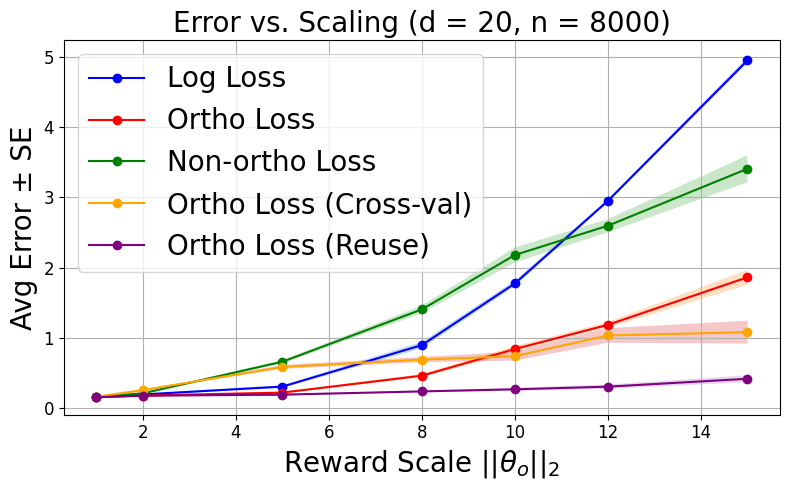

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# -------------------------------------------------
# 0)  Load results dictionary
# -------------------------------------------------
with open('data_gen/dictionary_diff_diff_data.pkl', 'rb') as f:
    dict_diff_comp_theta_data = pickle.load(f)

# -------------------------------------------------
# 1)  Fixed experiment settings
# -------------------------------------------------
fixed_dim   = 20
data_points = 8000
a_val_fixed = 1.0
alpha = 0.25

# -------------------------------------------------
# 2)  Choose the three curves to plot
# -------------------------------------------------
plot1 = [
    "logistic",                               # log-loss baseline
    "dml-time-separate",            # orthogonal
    "dml-non-ortho-time-separate",   # non-orthogonal
    "dml-time-separate-cross-val",
    "dml-time-separate-reuse"
]

#  Clean legend labels
label_map = {
    "logistic":                               "Log Loss",
    "dml-time-separate":            "Ortho Loss",
    "dml-non-ortho-time-separate":  "Non-ortho Loss",
    "dml-time-separate-cross-val": "Ortho Loss (Cross-val)",
    "dml-time-separate-reuse": "Ortho Loss (Reuse)"
}

color_map = {
    "logistic":                               "blue",
    "dml-time-separate":            "red",
    "dml-non-ortho-time-separate":  "green",
    "dml-time-separate-cross-val": "orange",
    "dml-time-separate-reuse": "purple"
}

# -------------------------------------------------
# 3)  Collect all bounds that have data for these settings
# -------------------------------------------------
bounds = sorted({
    bound
    for (bound, _, dim, dp, a_val) in dict_diff_comp_theta_data.keys()
    if dim == fixed_dim and dp == data_points and a_val == a_val_fixed
})

if not bounds:
    raise ValueError("No matching entries found — check the fixed parameters.")

# -------------------------------------------------
# 4)  Pre-allocate containers for mean / std
# -------------------------------------------------
avg1 = {m: [] for m in plot1}
std1 = {m: [] for m in plot1}
len1 = {m: [] for m in plot1}

# -------------------------------------------------
# 5)  Populate avg / std for each bound
# -------------------------------------------------
for bound in bounds:
    dists = {m: [] for m in plot1}

    # collect over all iterations
    for (b, _, dim, dp, a_val), metrics in dict_diff_comp_theta_data.items():
        if b == bound and dim == fixed_dim and dp == data_points and a_val == a_val_fixed:
            for m in plot1:
                if m in metrics:                       # guard: method present for this run
                    dists[m].append(metrics[m]['distance'])

    # compute mean ± standard error
    
    for m in plot1:
        arr = np.asarray(dists[m])
        avg1[m].append(arr.mean() if arr.size else np.nan)
        std1[m].append(arr.std(ddof=1) / np.sqrt(arr.size) if arr.size else np.nan)  # Standard error (unbiased)
        len1[m].append(arr.size if arr.size else np.nan)

# -------------------------------------------------
# 6)  Plot
# -------------------------------------------------
plt.figure(figsize=(8, 5))

for m in plot1:
    y     = np.asarray(avg1[m])
    yerr  = np.asarray(std1[m])
    plt.plot(bounds, y, marker='o', label=label_map[m], color = color_map[m])
    plt.fill_between(bounds, y - yerr, y + yerr, alpha=alpha)
    print (m, "len", len1[m])

plt.xlabel(r"Reward Scale $||\theta_o||_2$",fontsize=20)
plt.ylabel(f'Avg Error ± SE', fontsize=20)
plt.title(f"Error vs. Scaling (d = {fixed_dim}, n = {data_points})", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=20, loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig(f"plots/figure_dim{fixed_dim}_all.png", dpi=300)
plt.show()
